# Downloading input ERA5

In [ ]:
# @title Downlaoding input variables
#pip install necessary lib
!pip install cdsapi


  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=7bfee8c5bcdc87a102a06b9b2722fed810a59f5a8c28e6489cd98f8b7e69d4a5
  Stored in directory: /root/.cache/pip/wheels/be/05/e0/65a6edb0a000498aeaefbadd80228bf5ed1bdbb82840ca1692
Successfully built multiurl


In [ ]:
import cdsapi
import numpy as np

c = cdsapi.Client(url= '', key='')

# Request ERA5 data
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'mean_sea_level_pressure', '10m_u_component_of_wind',
            '10m_v_component_of_wind', '2m_temperature',
        ],
        'year': '2024',
        'month': '05',
        'day': '20',
        'time': [
            '06:00', '12:00', '18:00'
        ],
        'format': 'netcdf',
    },
    'surface_data.nc'
)


2024-11-29 16:03:16,254 WARNING [2024-11-27T00:00:00] System is back on service under testing conditions. Please follow updates [here](https://forum.ecmwf.int/t/cds-ads-and-ewds-down-until-further-notice/8015) and status [here](https://status.ecmwf.int/)
2024-11-29 16:03:16,257 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202)

980ff0cd9f096d58fe3103a4f9ed5ea9.nc:   0%|          | 0.00/19.9M [00:00<?, ?B/s]

'surface_data.nc'

In [ ]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset('surface_data.nc')

# Extract variables
mslp = ds['msl'].values  # Mean sea level pressure
u10 = ds['u10'].values   # 10m u-component wind
v10 = ds['v10'].values   # 10m v-component wind
t2m = ds['t2m'].values   # 2m temperature

# 2. Select a specific time step (e.g., 00:00)
mslp_mean = mslp[0]
u10_mean = u10[0]
v10_mean = v10[0]
t2m_mean = t2m[0]

# Combine variables into a single array
surface_data = np.stack([mslp_mean, u10_mean, v10_mean, t2m_mean])

# Save as a .npy file
np.save('input_surface.npy', surface_data)
print("Data saved as input_surface.npy")


loaded_data = np.load('input_surface.npy')
print(loaded_data.shape)  # Should output (4, 721, 1440)


Data saved as input_surface.npy
(4, 721, 1440)


In [ ]:
# Upper levels

# Request ERA5 data for upper-air variables
c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'geopotential',        # Z
            'specific_humidity',   # Q
            'temperature',         # T
            'u_component_of_wind', # U
            'v_component_of_wind', # V
        ],
        'pressure_level': [
            '1000', '925', '850', '700', '600',
            '500', '400', '300', '250', '200',
            '150', '100', '50',
        ],
        'year': '2024',
        'month': '05',
        'day': '20',
        'time': '06:00',
        'format': 'netcdf',
    },
    'upper_data.nc'
)

2024-11-29 16:04:38,428 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T from July 2024 until further notice - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-11-29 16:04:38,432 INFO Request ID is 62dc60e3-ddde-438a-9330-1379fec9aadc
INFO:datapi.legacy_api_client:Request ID is 62dc60e3-ddde-438a-9330-1379fec9aadc
2024-11-29 16:04:38,626 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2024-11-29 16:04:45,291 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been updated to running
2024-11-29 16:05:13,611 INFO status has been updated to successful
INFO:datapi.lega

565f55ca132a88fbfdb207bb27b94049.nc:   0%|          | 0.00/128M [00:00<?, ?B/s]

'upper_data.nc'

In [ ]:
# Open the NetCDF file
ds = xr.open_dataset('upper_data.nc')

# Extract variables for all pressure levels
z = ds['z'].values  # Geopotential
q = ds['q'].values  # Specific humidity
t = ds['t'].values  # Temperature
u = ds['u'].values  # U-component of wind
v = ds['v'].values  # V-component of wind

# Stack variables into the required shape
upper_data = np.stack([z, q, t, u, v])  # Shape: (5, 13, 721, 1440)

# Remove the extra time dimension
upper_data = np.squeeze(upper_data, axis=1)  # Remove the 2nd dimension

# Check the new shape
print("Adjusted shape:", upper_data.shape)  # Should be (5, 13, 721, 1440)

# Save the adjusted array
np.save('input_upper.npy', upper_data)
print("Data saved as input_upper.npy")


Adjusted shape: (5, 13, 721, 1440)
Data saved as input_upper.npy


In [ ]:
# @title Downloading the forecasted era5

import cdsapi
import numpy as np

c = cdsapi.Client(url= '', key='')

# Request surface data from 06:00 UTC on May 20 to 05:00 UTC on May 21
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure'
        ],
        'year': '2024',
        'month': ['05'],  # Only May
        'day': ['20'],  # May 20 and 21
        'time': [
            '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
            '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
            '22:00', '23:00'
        ],
        'format': 'netcdf',  # Save as NetCDF format
    },
    'era5_surface_2024_05_20.nc'
)


c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '2m_temperature', '10m_u_component_of_wind', '10m_v_component_of_wind', 'mean_sea_level_pressure'
        ],
        'year': '2024',
        'month': ['05'],  # Only May
        'day': ['21'],  # May 20 and 21
        'time': [
             '00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00'
        ],
        'format': 'netcdf',  # Save as NetCDF format
    },
    'era5_surface_2024_05_21.nc'
)


2024-12-02 21:36:36,378 WARNING [2024-11-27T00:00:00] System is back on service under testing conditions. Please follow updates [here](https://forum.ecmwf.int/t/cds-ads-and-ewds-down-until-further-notice/8015) and status [here](https://status.ecmwf.int/)
2024-12-02 21:36:36,382 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:datapi.legacy_api_client:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202)

cb1fda6f14da7dd9a7f0d88bac7bd70b.nc:   0%|          | 0.00/112M [00:00<?, ?B/s]

2024-12-02 21:37:01,540 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T from July 2024 until further notice - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-12-02 21:37:01,543 INFO Request ID is 88809c16-1900-4c3b-966f-cea014397338
INFO:datapi.legacy_api_client:Request ID is 88809c16-1900-4c3b-966f-cea014397338
2024-12-02 21:37:01,638 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2024-12-02 21:37:10,054 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been updated to running
2024-12-02 21:37:22,801 INFO status has been updated to successful
INFO:datapi.lega

54c6e8f0f30843dc59492c4ba74ebc0d.nc:   0%|          | 0.00/46.1M [00:00<?, ?B/s]

'era5_surface_2024_05_21.nc'

In [ ]:
import xarray as xr

# Open the datasets
ds1 = xr.open_dataset('era5_surface_2024_05_20.nc')
ds2 = xr.open_dataset('era5_surface_2024_05_21.nc')

# Concatenate along `valid_time`, flattening into a single `time` dimension
# This assumes the `valid_time` represents continuous hourly forecasts
combined_ds = xr.concat([ds1, ds2], dim='valid_time')

# Rename `valid_time` to `time` for clarity
combined_ds = combined_ds.rename({'valid_time': 'time'})

# Save the flattened dataset
combined_ds.to_netcdf('era5_surface_2024_05_20_to_05_21.nc')

print("Flattened dataset saved as 'era5_surface_flat_2024_05_20_to_05_21.nc'")


Flattened dataset saved as 'era5_surface_flat_2024_05_20_to_05_21.nc'


In [ ]:
print(combined_ds)

# Verify the time dimension
print(combined_ds['time'])


<xarray.Dataset> Size: 399MB
Dimensions:    (time: 24, latitude: 721, longitude: 1440)
Coordinates:
    number     int64 8B 0
  * time       (time) datetime64[ns] 192B 2024-05-20T07:00:00 ... 2024-05-21T...
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver     (time) <U4 384B '0001' '0001' '0001' ... '0001' '0001' '0001'
Data variables:
    t2m        (time, latitude, longitude) float32 100MB 264.6 264.6 ... 220.2
    u10        (time, latitude, longitude) float32 100MB -4.179 -4.179 ... 3.156
    v10        (time, latitude, longitude) float32 100MB 4.244 4.244 ... -1.739
    msl        (time, latitude, longitude) float32 100MB 1.021e+05 ... 9.918e+04
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             

In [ ]:
# @title Downloading the upper layers

# Request upper-air data from 06:00 UTC on May 20 to 05:00 UTC on May 21
c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'geopotential', 'specific_humidity', 'temperature',
            'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': [
            '50', '100', '150', '200', '250', '300', '400',
            '500', '600', '700', '850', '925', '1000',
        ],
        'year': '2024',
        'month': ['05'],  # Only May
        'day': ['20'],  # May 20 and 21
        'time': [
            '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
            '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
            '22:00', '23:00'
        ],
        'format': 'netcdf',  # Save as NetCDF format
    },
    'era5_upper_2024_05_20.nc'
)


c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            'geopotential', 'specific_humidity', 'temperature',
            'u_component_of_wind', 'v_component_of_wind',
        ],
        'pressure_level': [
            '50', '100', '150', '200', '250', '300', '400',
            '500', '600', '700', '850', '925', '1000',
        ],
        'year': '2024',
        'month': ['05'],  # Only May
        'day': ['20'],  # May 20 and 21
        'time': [
             '00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00'
        ],
        'format': 'netcdf',  # Save as NetCDF format
    },
    'era5_upper_2024_05_21.nc'
)

# Open the datasets
ds3 = xr.open_dataset('era5_upper_2024_05_20.nc')
ds4 = xr.open_dataset('era5_upper_2024_05_21.nc')

# Concatenate along `valid_time`, flattening into a single `time` dimension
# This assumes the `valid_time` represents continuous hourly forecasts
combined_ds2 = xr.concat([ds3, ds4], dim='valid_time')

# Rename `valid_time` to `time` for clarity
combined_ds2 = combined_ds2.rename({'valid_time': 'time'})

# Save the flattened dataset
combined_ds2.to_netcdf('era5_upper_2024_05_20_to_05_21.nc')

2024-12-02 21:38:26,627 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T from July 2024 until further notice - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-12-02 21:38:26,629 INFO Request ID is 620fbaf3-428b-49e4-b5f5-5b8c4fca6a40
INFO:datapi.legacy_api_client:Request ID is 620fbaf3-428b-49e4-b5f5-5b8c4fca6a40
2024-12-02 21:38:26,693 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2024-12-02 21:38:31,655 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been updated to running
2024-12-02 21:44:51,273 INFO status has been updated to successful
INFO:datapi.lega

fd49b0b86cc6dc9ea72db606c8c6fd17.nc:   0%|          | 0.00/1.69G [00:00<?, ?B/s]

2024-12-02 21:46:19,626 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T from July 2024 until further notice - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-12-02 21:46:19,629 INFO Request ID is 4f0f8103-c092-4277-9ea5-b4aefd5126f0
INFO:datapi.legacy_api_client:Request ID is 4f0f8103-c092-4277-9ea5-b4aefd5126f0
2024-12-02 21:46:19,752 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2024-12-02 21:46:24,725 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been updated to running
2024-12-02 21:49:11,818 INFO status has been updated to successful
INFO:datapi.lega

11771a3efa887edf33e443a2322c8137.nc:   0%|          | 0.00/715M [00:00<?, ?B/s]

In [ ]:
print(combined_ds2)

# Verify the time dimension
print(combined_ds2['time'])

<xarray.Dataset> Size: 6GB
Dimensions:         (time: 24, pressure_level: 13, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B 0
  * time            (time) datetime64[ns] 192B 2024-05-20T07:00:00 ... 2024-0...
  * pressure_level  (pressure_level) float64 104B 1e+03 925.0 ... 100.0 50.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          (time) <U4 384B '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    z               (time, pressure_level, latitude, longitude) float32 1GB 1...
    q               (time, pressure_level, latitude, longitude) float32 1GB 0...
    t               (time, pressure_level, latitude, longitude) float32 1GB 2...
    u               (time, pressure_level, latitude, longitude) float32 1GB 0...
    v               (time, pressure_level, latitude, longitude) float32 1GB 0...
Attributes:
   

In [ ]:
# @title Saving the files

from google.colab import drive
drive.mount('/content/drive')

# Move the files to your Drive
!mv era5_surface_2024_05_20_to_05_21.nc /content/drive/MyDrive/Pangwu
!mv era5_upper_2024_05_20_to_05_21.nc /content/drive/MyDrive/Pangwu


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Running the Pangu-Weather

In [ ]:
!pip install -r requirements_cpu.txt #installing required lib to run Pangu

In [ ]:
!python inference_cpu.py # python inference_gpu.py for gpu environment for a 24 forecast run

In [ ]:
!python inference_iterative.py # running pangu hourly for 24 hours

python3: can't open file '/content/inference_iterative.py': [Errno 2] No such file or directory


In [ ]:
!pip install cartopy #installing cartopy to visualize the forecasts
!apt-get install libgeos-dev
!pip install basemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 35.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 8.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.ndimage import zoom
import numpy as np
import xarray as xr
# Load the surface output .npy file and upper output .npy file

from google.colab import drive
drive.mount('/content/drive')

# Specify the file paths
upper_file_path = '/content/drive/My Drive/Pangu/hourly_upper_outputs.npy'
surface_file_path = '/content/drive/My Drive/Pangu/hourly_surface_outputs.npy'
era5_surface_path = '/content/drive/My Drive/Pangu/era5_surface_2024_05_20_to_05_21.nc'
era5_upper_path = '/content/drive/My Drive/Pangu/era5_upper_2024_05_20_to_05_21.nc'

# Load the files
hourly_upper_outputs = np.load(upper_file_path)
hourly_surface_outputs = np.load(surface_file_path)
era5_surface = xr.open_dataset(era5_surface_path)
era5_upper = xr.open_dataset(era5_upper_path)

# Check the shapes
print("Hourly Upper Outputs Shape:", hourly_upper_outputs.shape)
print("Hourly Surface Outputs Shape:", hourly_surface_outputs.shape)
print("ERA5 surface data variables:", list(era5_surface.data_vars))
print("ERA5 upper data variables:", list(era5_upper.data_vars))
print("ERA5 upper data variables:", era5_upper.sizes)

Mounted at /content/drive
Hourly Upper Outputs Shape: (24, 5, 13, 721, 1440)
Hourly Surface Outputs Shape: (24, 4, 721, 1440)
ERA5 surface data variables: ['t2m', 'u10', 'v10', 'msl']
ERA5 upper data variables: ['z', 'q', 't', 'u', 'v']
ERA5 upper data variables: Frozen({'longitude': 1440, 'latitude': 721, 'time': 24, 'pressure_level': 13})


In [ ]:
# Extract T2M data (adjust variable names if necessary)
forecast_t2m = hourly_surface_outputs[:, 3, :, :]  # T2M from forecast
era5_t2m = era5_surface['t2m'].values  # Replace 't2m' with the actual T2M variable in ERA5

# Ensure dimensions align (time, lat, lon)
print("Forecast T2M shape:", forecast_t2m.shape)
print("ERA5 T2M shape:", era5_t2m.shape)

Forecast T2M shape: (24, 721, 1440)
ERA5 T2M shape: (24, 721, 1440)


Data shape: (24, 4, 721, 1440)


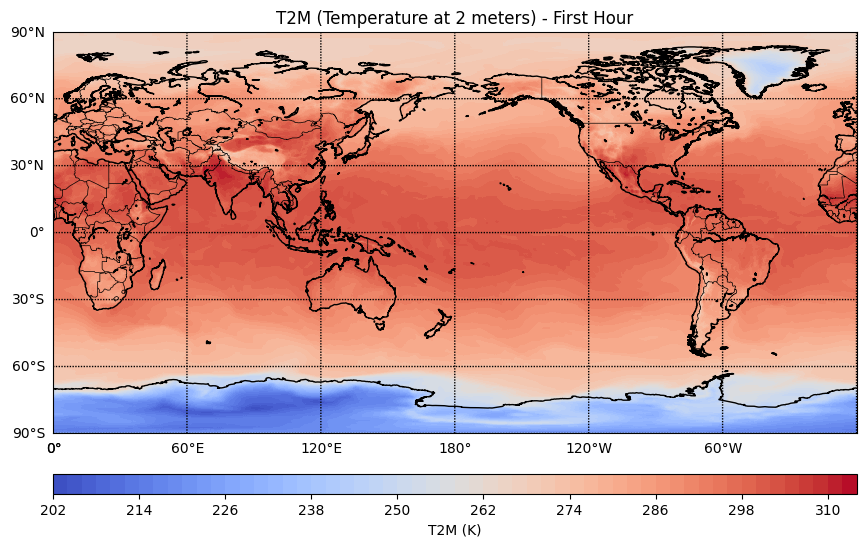

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the NumPy file

data = hourly_surface_outputs

# Check the structure of the data
print("Data shape:", data.shape)

# Assuming the data shape is (24, 4, 720, 1440)
# 24 hours, 4 variables (MSLP, U10, V10, T2M), and spatial grid (lat, lon)
t2m_data = data[:, 3, :, :]  # Extract T2M for all hours

# Plot T2M for the first hour as an example
t2m_first_hour = t2m_data[20, :, :]

# Set up the map projection
fig, ax = plt.subplots(figsize=(12, 6))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=0, urcrnrlon=360, ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(np.arange(0., 361., 60.), labels=[0, 0, 0, 1], fontsize=10)

# Define longitude and latitude grids
lon = np.linspace(0, 360, t2m_first_hour.shape[1])
lat = np.linspace(90, -90, t2m_first_hour.shape[0])
lon, lat = np.meshgrid(lon, lat)

# Plot T2M
cs = m.contourf(lon, lat, t2m_first_hour, 60, cmap='coolwarm', latlon=True)
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('T2M (K)')

plt.title('T2M (Temperature at 2 meters) - First Hour')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os

# Load the NumPy file
data = hourly_surface_outputs

# Check the structure of the data
print("Data shape:", data.shape)

# Assuming the data shape is (24, 4, 720, 1440)
# 24 hours, 4 variables (MSLP, U10, V10, T2M), and spatial grid (lat, lon)
t2m_data = data[:, 3, :, :]  # Extract T2M for all hours

# Create a directory to save the plots
output_dir = 't2m_plots'
os.makedirs(output_dir, exist_ok=True)

# Define a function to plot and save T2M for a given hour
def save_t2m_plot(hour):
    t2m_hour = t2m_data[hour, :, :]
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set up the map projection
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=0, urcrnrlon=360, ax=ax)

    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(0., 361., 60.), labels=[0, 0, 0, 1], fontsize=10)

    # Define longitude and latitude grids
    lon = np.linspace(0, 360, t2m_hour.shape[1])
    lat = np.linspace(90, -90, t2m_hour.shape[0])
    lon, lat = np.meshgrid(lon, lat)

    # Plot T2M
    cs = m.contourf(lon, lat, t2m_hour, 60, cmap='coolwarm', latlon=True)
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label('T2M (K)')

    plt.title(f'T2M (Temperature at 2 meters) - Hour {hour + 1}')

    # Save the plot
    output_path = os.path.join(output_dir, f't2m_hour_{hour + 1:02d}.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close the figure to save memory

# Loop through all 24 hours and save each plot
for hour in range(t2m_data.shape[0]):
    save_t2m_plot(hour)

print(f"Plots saved in the directory: {output_dir}")


Data shape: (24, 4, 721, 1440)
Plots saved in the directory: t2m_plots


In [ ]:
import shutil

# Zip the folder
shutil.make_archive('t2m_plots', 'zip', 't2m_plots')

print("Folder compressed into t2m_plots.zip")


Folder compressed into t2m_plots.zip


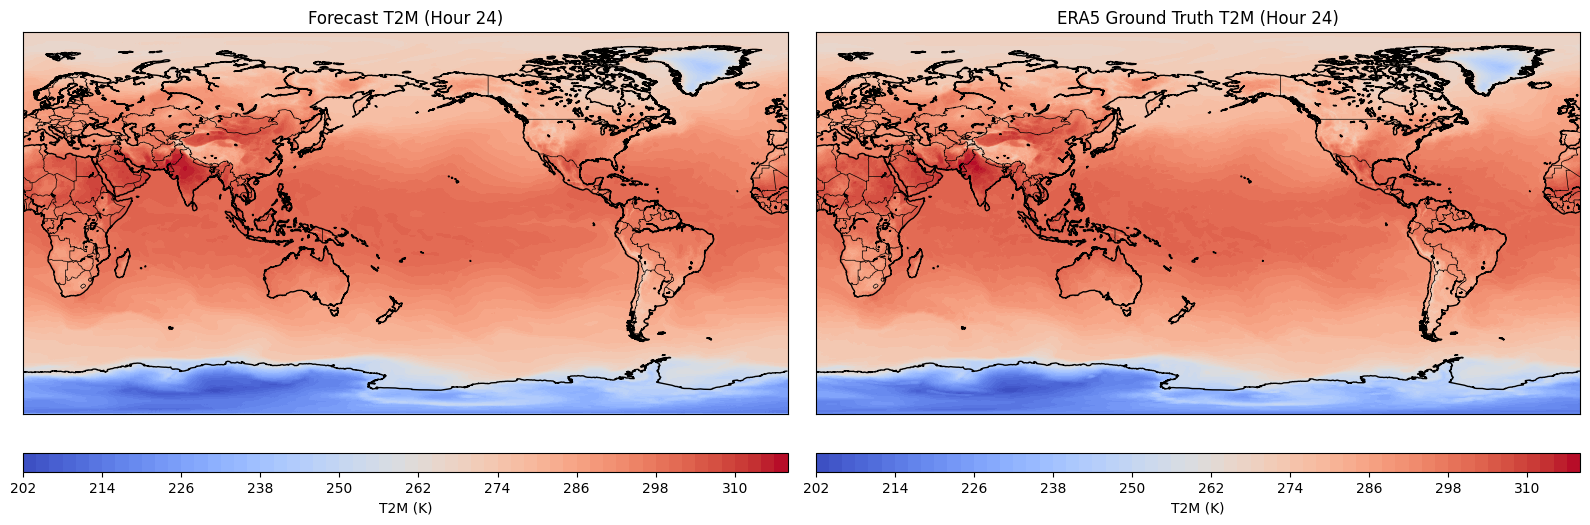

In [ ]:
# @title Comparing forecast and ground truth

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Select a time step (e.g., the first hour)
time_step = 23
forecast_t2m_hour = forecast_t2m[time_step, :, :]
era5_t2m_hour = era5_t2m[time_step, :, :]

# Define the longitude and latitude grid
lon = np.linspace(0, 360, forecast_t2m_hour.shape[1])
lat = np.linspace(90, -90, forecast_t2m_hour.shape[0])
lon, lat = np.meshgrid(lon, lat)

# Create a function to plot the data
def plot_t2m(ax, data, title):
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=0, urcrnrlon=360, ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    cs = m.contourf(lon, lat, data, 60, cmap='coolwarm', latlon=True)
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label('T2M (K)')
    ax.set_title(title)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_t2m(axes[0], forecast_t2m_hour, "Forecast T2M (Hour 24)")
plot_t2m(axes[1], era5_t2m_hour, "ERA5 Ground Truth T2M (Hour 24)")

plt.tight_layout()
plt.show()

In [ ]:
# @title Calculating the MAE

# Calculate hourly MAE for T2M
hourly_mae_t2m = np.abs(forecast_t2m - era5_t2m)  # MAE for each hour
print("Hourly MAE shape:", hourly_mae_t2m.shape)  # (24, lat, lon)

Hourly MAE shape: (24, 721, 1440)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os

# Define a constant MAE range
vmin = 0  # Minimum MAE value
vmax = 12  # Maximum MAE value

# Create a folder to save the plots
output_dir = "hourly_mae_plots"
os.makedirs(output_dir, exist_ok=True)

# Define the longitude and latitude grid
lon = np.linspace(0, 360, hourly_mae_t2m.shape[2])
lat = np.linspace(90, -90, hourly_mae_t2m.shape[1])
lon, lat = np.meshgrid(lon, lat)

# Function to plot hourly MAE
def plot_hourly_mae(hour):
    mae_hour = hourly_mae_t2m[hour, :, :]
    fig, ax = plt.subplots(figsize=(12, 6))

    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=0, urcrnrlon=360, ax=ax)
    m.drawcoastlines()
    m.drawcountries()
    cs = m.contourf(lon, lat, mae_hour, 60, levels=np.linspace(vmin, vmax, 21), cmap='coolwarm', latlon=True, vmin=vmin,vmax=vmax)
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label('Mean Absolute Error (K)')

    plt.title(f'Mean Absolute Error (T2M) - Hour {hour + 1}')

    # Save the plot
    output_path = os.path.join(output_dir, f'mae_t2m_hour_{hour + 1:02d}.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close(fig)  # Close the figure to save memory

# Plot and save MAE for each hour
for hour in range(hourly_mae_t2m.shape[0]):
    plot_hourly_mae(hour)

print(f"Hourly MAE plots saved in the directory: {output_dir}")


Hourly MAE plots saved in the directory: hourly_mae_plots


In [ ]:
import shutil
from google.colab import files

# Compress the folder into a zip file
shutil.make_archive('hourly_mae_plots', 'zip', output_dir)

# Download the zip file
files.download('hourly_mae_plots.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Over Southern Ontario
# Define Southern Ontario bounds
lat_min, lat_max = 41.0, 50.0
lon_min, lon_max = 277.0, 286.0  # Convert -83° to -74° into 0–360° format

# Find indices for the region
lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_so = lat[lat_indices]
lon_so = lon[lon_indices]



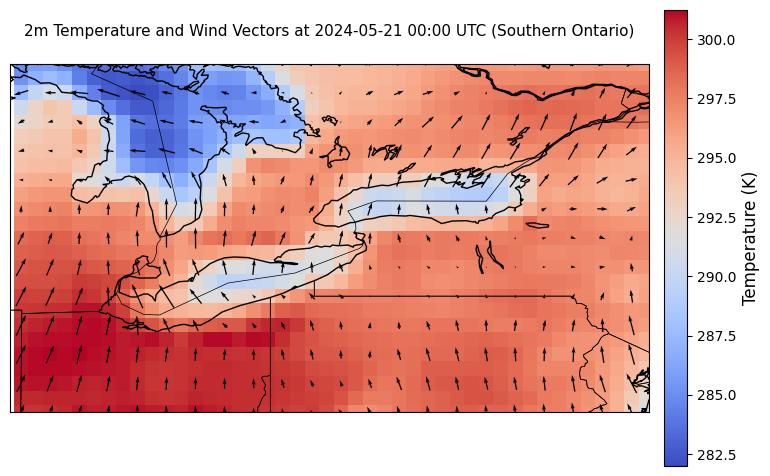

In [ ]:
# @title T2 plot with wind vectors at 10m
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta

# Define the start time (07:00 UTC on the first day)
start_time = datetime(2024, 5, 20, 7, 0)  # Adjust this date as needed

# Generate a list of time labels for 24 hours
hour_labels = [(start_time + timedelta(hours=i)).strftime('%Y-%m-%d %H:%M UTC') for i in range(24)]

# Use the already loaded surface data
surface_data = hourly_surface_outputs  # Assumed already loaded

# Extract data for 2m temperature, U10 (zonal wind), and V10 (meridional wind)
temperature_2m = surface_data[:, 3, :, :]  # 4th variable (index 3)
u10 = surface_data[:, 1, :, :]  # U10 is the 2nd variable (index 1)
v10 = surface_data[:, 2, :, :]  # V10 is the 3rd variable (index 2)

# Create latitude and longitude arrays based on the dataset's global grid
lat = np.linspace(90, -90, 721)  # 721 latitude points
lon = np.linspace(0, 360, 1440)  # 1440 longitude points

# Define the bounding box for Southern Ontario (lat: 41 to 46, lon: 277 to 286 in 0-360 format)
lat_min, lat_max = 40, 46
lon_min, lon_max = 275, 286  # Convert -83 to -74 to 0-360 by adding 360

# Find indices corresponding to the bounding box
lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the data to the region of interest
temperature_2m_subset = temperature_2m[:, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
u10_subset = u10[:, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
v10_subset = v10[:, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
lat_subset = lat[lat_indices.min():lat_indices.max()+1]
lon_subset = lon[lon_indices.min():lon_indices.max()+1]

# Select the hour to plot (e.g., hour 0)
hour = 17
temperature_2m_hour = temperature_2m_subset[hour]
u10_hour = u10_subset[hour]
v10_hour = v10_subset[hour]

# Set up the map projection (cylindrical)
fig, ax = plt.subplots(figsize=(8, 6))
m = Basemap(projection='cyl', resolution='i', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min-360, urcrnrlon=lon_max-360, ax=ax)  # Convert lon back to -180 to 180

# Plot the temperature data
lon_grid, lat_grid = np.meshgrid(lon_subset - 360, lat_subset)  # Convert lon back to -180 to 180
temp_plot = m.pcolormesh(lon_grid, lat_grid, temperature_2m_hour, cmap='coolwarm', shading='auto')

# Plot wind vectors (quiver)
# Downsample the wind data for better visualization
skip = 2  # Adjust this value as needed to control arrow density
lon_quiver = lon_grid[::skip, ::skip]
lat_quiver = lat_grid[::skip, ::skip]
u10_quiver = u10_hour[::skip, ::skip]*5
v10_quiver = v10_hour[::skip, ::skip]*5

# Add the quiver plot
quiver = m.quiver(lon_quiver, lat_quiver, u10_quiver, v10_quiver, scale=500, color='black', pivot='middle', width=0.002)

# Add coastlines and other map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Add a title
ax.set_title(f'2m Temperature and Wind Vectors at {hour_labels[hour]} (Southern Ontario)', fontsize=11, pad=20)

# Add a colorbar
cbar = plt.colorbar(temp_plot, orientation='vertical', pad=0.02, shrink=0.8, ax=ax)
cbar.set_label('Temperature (K)', fontsize=12)

plt.tight_layout()
plt.show()


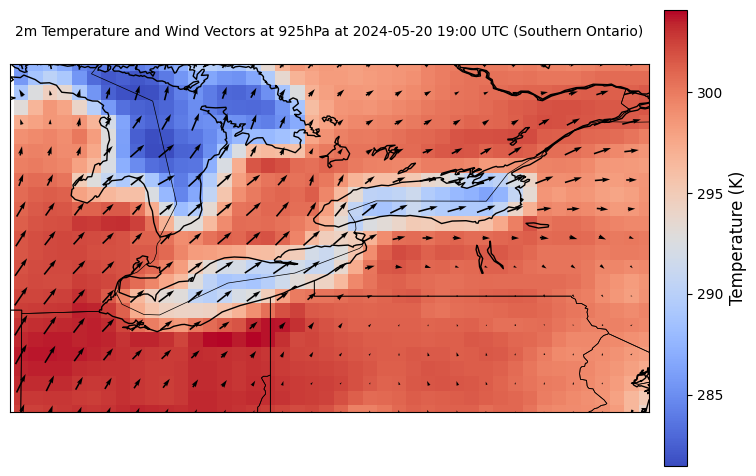

In [ ]:
# @title T2 plot with wind vectors at 500m
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta

# Define the start time (07:00 UTC on the first day)
start_time = datetime(2024, 5, 20, 7, 0)  # Adjust this date as needed

# Generate a list of time labels for 24 hours
hour_labels = [(start_time + timedelta(hours=i)).strftime('%Y-%m-%d %H:%M UTC') for i in range(24)]

# Use the already loaded surface data
surface_data = hourly_surface_outputs  # Assumed already loaded

# Extract data for 2m temperature, U10 (zonal wind), and V10 (meridional wind)
temperature_2m = surface_data[:, 3, :, :]  # 4th variable (index 3)
u10 = surface_data[:, 1, :, :]  # U10 is the 2nd variable (index 1)
v10 = surface_data[:, 2, :, :]  # V10 is the 3rd variable (index 2)
u925 = hourly_upper_outputs[:, 3, 1, :, :]
v925 = hourly_upper_outputs[:, 4, 1, :, :]


# Create latitude and longitude arrays based on the dataset's global grid
lat = np.linspace(90, -90, 721)  # 721 latitude points
lon = np.linspace(0, 360, 1440)  # 1440 longitude points

# Define the bounding box for Southern Ontario (lat: 41 to 46, lon: 277 to 286 in 0-360 format)
lat_min, lat_max = 40, 46
lon_min, lon_max = 275, 286  # Convert -83 to -74 to 0-360 by adding 360

# Find indices corresponding to the bounding box
lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the data to the region of interest
temperature_2m_subset = temperature_2m[:, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
u925_subset = u925[:, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
v925_subset = v925[:, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
lat_subset = lat[lat_indices.min():lat_indices.max()+1]
lon_subset = lon[lon_indices.min():lon_indices.max()+1]

# Select the hour to plot (e.g., hour 0)
hour = 12
temperature_2m_hour = temperature_2m_subset[hour]
u925_hour = u925_subset[hour]
v925_hour = v925_subset[hour]

# Set up the map projection (cylindrical)
fig, ax = plt.subplots(figsize=(8, 6))
m = Basemap(projection='cyl', resolution='i', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min-360, urcrnrlon=lon_max-360, ax=ax)  # Convert lon back to -180 to 180

# Plot the temperature data
lon_grid, lat_grid = np.meshgrid(lon_subset - 360, lat_subset)  # Convert lon back to -180 to 180
temp_plot = m.pcolormesh(lon_grid, lat_grid, temperature_2m_hour, cmap='coolwarm', shading='auto')

# Plot wind vectors (quiver)
# Downsample the wind data for better visualization
skip = 2  # Adjust this value as needed to control arrow density
lon_quiver = lon_grid[::skip, ::skip]
lat_quiver = lat_grid[::skip, ::skip]
u925_quiver = u925_hour[::skip, ::skip]
v925_quiver = v925_hour[::skip, ::skip]

# Add the quiver plot
quiver = m.quiver(lon_quiver, lat_quiver, u925_quiver, v925_quiver, scale=200, color='black', pivot='middle', width=0.0025)

# Add coastlines and other map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Add a title
ax.set_title(f'2m Temperature and Wind Vectors at 925hPa at {hour_labels[hour]} (Southern Ontario)', fontsize=10, pad=20)

# Add a colorbar
cbar = plt.colorbar(temp_plot, orientation='vertical', pad=0.02, shrink=0.8, ax=ax)
cbar.set_label('Temperature (K)', fontsize=12)

plt.tight_layout()
plt.show()


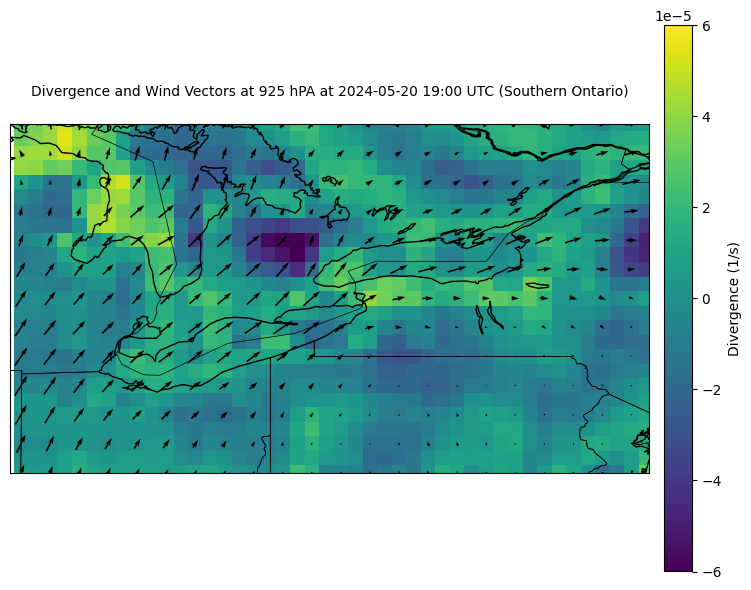

In [ ]:
# @title Calculating divergence at 925 hPa

# Calculate the divergence of the wind field
from numpy import gradient, cos, deg2rad

# Grid spacing in degrees (latitude and longitude are evenly spaced in your dataset)
dx = np.gradient(lon_subset - 360)  # Longitude grid spacing
dy = np.gradient(lat_subset)  # Latitude grid spacing

# Earth's radius (in meters)
R = 6371000
# Convert dx and dy to meters
dx = dx * (np.pi / 180) * R * cos(deg2rad(lat_subset[:, None]))  # Adjust for latitude
dy = dy * (np.pi / 180) * R

# Select the hour to plot (e.g., hour 0)
hour = 12
u925_hour = u925_subset[hour]
v925_hour = v925_subset[hour]

# Calculate partial derivatives
du_dx = gradient(u925_hour, axis=1) / dx  # Zonal derivative
#du_dx = gradient(u10_hour, axis=1) / dx  # Zonal derivative
#dv_dy = gradient(v10_hour, axis=0) / dy[:, None]  # Meridional derivative
dv_dy = gradient(v925_hour, axis=0) / dy[:, None]  # Reshaping `dy` to (25, 1) for broadcasting to calculate meridional derivative

# Compute divergence
divergence = du_dx + dv_dy

# Plot the divergence field
fig, ax = plt.subplots(figsize=(8, 6))
m = Basemap(projection='cyl', resolution='i', llcrnrlat=lat_min, urcrnrlat=lat_max,
            llcrnrlon=lon_min-360, urcrnrlon=lon_max-360, ax=ax)

# Plot the divergence
div_plot = m.pcolormesh(lon_grid, lat_grid, divergence, cmap='viridis', shading='auto',vmin=-0.00006,vmax=0.00006) # bwr
plt.colorbar(div_plot, orientation='vertical', pad=0.02, ax=ax, label='Divergence (1/s)')

# Plot wind vectors
skip = 2
m.quiver(lon_quiver, lat_quiver, u925_quiver, v925_quiver, scale=200, color='black', pivot='middle', width=0.0025)

# Add coastlines and map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Add title
ax.set_title(f'Divergence and Wind Vectors at 925 hPA at {hour_labels[hour]} (Southern Ontario)', fontsize=10, pad=20)

plt.tight_layout()
plt.show()


In [ ]:

import zipfile
import os

# Folder to store plots
os.makedirs("divergence_plots", exist_ok=True)

# Loop through each hour
for hour in range(u925.shape[0]):
    u925_hour = u925[hour, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]
    v925_hour = v925[hour, lat_indices.min():lat_indices.max()+1, lon_indices.min():lon_indices.max()+1]

    # Compute derivatives
    du_dx = gradient(u925_hour, axis=1) / dx  # Zonal derivative
    dv_dy = gradient(v925_hour, axis=0) / dy[:, None]  # Meridional derivative

    # Compute divergence
    divergence = du_dx + dv_dy

    # Set up the map
    fig, ax = plt.subplots(figsize=(8, 6))
    m = Basemap(projection='cyl', resolution='i', llcrnrlat=lat_min, urcrnrlat=lat_max,
                llcrnrlon=lon_min-360, urcrnrlon=lon_max-360, ax=ax)
    lon_grid, lat_grid = np.meshgrid(lon_subset - 360, lat_subset)

    # Plot divergence
    div_plot = m.pcolormesh(lon_grid, lat_grid, divergence, cmap='viridis', shading='auto', vmin=-0.00006, vmax=0.00006)
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Add quiver for wind vectors (downsampled)
    skip = 2
    u_quiver = u925_hour[::skip, ::skip]
    v_quiver = v925_hour[::skip, ::skip]
    lon_quiver = lon_grid[::skip, ::skip]
    lat_quiver = lat_grid[::skip, ::skip]
    m.quiver(lon_quiver, lat_quiver, u_quiver, v_quiver, scale=200, color='black', pivot='middle', width=0.002)

    # Add title and colorbar
    ax.set_title(f'Divergence and Wind Vectors at 925hPa at {hour_labels[hour]} (Southern Ontario)', fontsize=10, pad=20)
    cbar = plt.colorbar(div_plot, orientation='vertical', pad=0.02, shrink=0.8, ax=ax)
    cbar.set_label('Divergence (1/s)', fontsize=12)

    # Save the plot
    plot_filename = f"divergence_plots/divergence_{hour:02d}.png"
    plt.savefig(plot_filename)
    plt.close()

# Create ZIP file
zip_filename = "divergence_plots.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk("divergence_plots"):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

print(f"All plots have been saved and compressed into {zip_filename}.")

All plots have been saved and compressed into divergence_plots.zip.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
import zipfile
from datetime import datetime, timedelta

# Load the surface data
surface_data = hourly_surface_outputs  # Assumes data is already loaded as `hourly_surface_outputs`

# Extract data for 2m temperature, U10 (zonal wind), and V10 (meridional wind)
temperature_2m = surface_data[:, 3, :, :]  # 4th variable (index 3)
u10 = surface_data[:, 1, :, :]  # U10 is the 2nd variable (index 1)
v10 = surface_data[:, 2, :, :]  # V10 is the 3rd variable (index 2)

# Create latitude and longitude arrays based on the dataset's global grid
lat = np.linspace(90, -90, 721)  # 721 latitude points
lon = np.linspace(0, 360, 1441)  # 1440 longitude points

# Define the bounding box for Southern Ontario (lat: 41 to 46, lon: 277 to 286 in 0-360 format)
lat_min, lat_max = 40, 46
lon_min, lon_max = 275, 286  # Convert -83 to -74 to 0-360 by adding 360

# Find indices corresponding to the bounding box
lat_indices = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_indices = np.where((lon >= lon_min) & (lon <= lon_max))[0]

# Subset the latitude and longitude arrays for the region
lat_subset = lat[lat_indices.min():lat_indices.max() + 1]
lon_subset = lon[lon_indices.min():lon_indices.max() + 1]

# Define the start time (07:00 UTC on the first day)
start_time = datetime(2024, 5, 20, 7, 0)  # Adjust this date as needed

# Generate a list of time labels for 24 hours
hour_labels = [(start_time + timedelta(hours=i)).strftime('%Y-%m-%d %H:%M UTC') for i in range(24)]

# Set up folder to save plots
output_folder = "hourly_t2m_plots"
os.makedirs(output_folder, exist_ok=True)

# Generate and save plots for each hour
for hour in range(temperature_2m.shape[0]):
    # Subset temperature and wind data for the hour
    temperature_2m_hour = temperature_2m[hour, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]
    u10_hour = u10[hour, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]
    v10_hour = v10[hour, lat_indices.min():lat_indices.max() + 1, lon_indices.min():lon_indices.max() + 1]

    # Set up the map projection (cylindrical)
    fig, ax = plt.subplots(figsize=(8, 6))
    m = Basemap(projection='cyl', resolution='i', llcrnrlat=lat_min, urcrnrlat=lat_max,
                llcrnrlon=lon_min - 360, urcrnrlon=lon_max - 360, ax=ax)  # Convert lon back to -180 to 180

    # Create grid for plotting
    lon_grid, lat_grid = np.meshgrid(lon_subset - 360, lat_subset)  # Convert lon back to -180 to 180

    # Plot temperature
    temp_plot = m.pcolormesh(lon_grid, lat_grid, temperature_2m_hour, cmap='coolwarm', shading='auto', vmin=280, vmax=305)

    # Add wind vectors (quiver)
    skip = 2  # Downsample for less clutter
    lon_quiver = lon_grid[::skip, ::skip]
    lat_quiver = lat_grid[::skip, ::skip]
    u10_quiver = u10_hour[::skip, ::skip]*5
    v10_quiver = v10_hour[::skip, ::skip]*5
    m.quiver(lon_quiver, lat_quiver, u10_quiver, v10_quiver, scale=500, color='black', pivot='middle', width=0.002)

    # Add coastlines and features
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()

    # Add title with the actual time label
    ax.set_title(f'2m Temperature and 10m-Wind Vectors at {hour_labels[hour]}', fontsize=11, pad=20)

    # Add colorbar
    cbar = plt.colorbar(temp_plot, orientation='vertical', pad=0.02, shrink=0.8, ax=ax)
    cbar.set_label('Temperature (K)', fontsize=12)

    # Save the plot to the output folder
    plot_filename = os.path.join(output_folder, f't2m_hour_{hour + 1}.png')
    plt.savefig(plot_filename, dpi=300)
    plt.close(fig)

# Create a ZIP file containing all the plots
zip_filename = "t2m_wind10_hourly_plots.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

print(f"Plots saved and zipped as {zip_filename}")


Plots saved and zipped as t2m_wind10_hourly_plots.zip


In [ ]:
# @title Collecting variables at London weather station

# Decimal degrees conversion
latitude = 43.03
longitude = -81.15

# Print the coordinates in decimal degrees
print(f"Latitude: {latitude}, Longitude: {longitude}")

Latitude: 43.03, Longitude: -81.15


In [ ]:
import numpy as np

# (lat/lon arrays)
lat = np.linspace(90, -90, 721)  # Latitude from -90 to 90
lon = np.linspace(0, 360, 1440)  # Longitude from 0 to 360

# Convert longitude to 0–360 if it is negative
if longitude < 0:
    longitude = longitude + 360
    print(f"Converted longitude to 0–360 range: {longitude}")

# Find the closest latitude and longitude indices
lat_idx = np.abs(lat - latitude).argmin()  # Closest latitude index
lon_idx = np.abs(lon - longitude).argmin()  # Closest longitude index

# Print the closest indices and corresponding lat/lon values
print(f"Closest latitude index: {lat_idx}, Latitude: {lat[lat_idx]}")
print(f"Closest longitude index: {lon_idx}, Longitude: {lon[lon_idx]}")


Converted longitude to 0–360 range: 278.85
Closest latitude index: 188, Latitude: 43.0
Closest longitude index: 1115, Longitude: 278.9437109103544


In [ ]:
# Extract data for the specific location (hourly)
forecast_u10_point = hourly_surface_outputs[:, 1, lat_idx, lon_idx]
forecast_v10_point = hourly_surface_outputs[:, 2, lat_idx, lon_idx]
forecast_t2_point = hourly_surface_outputs[:, 3, lat_idx, lon_idx]
forecast_t925_point = hourly_upper_outputs[:, 2, 1, lat_idx, lon_idx]
forecast_u925_point = hourly_upper_outputs[:, 3, 1, lat_idx, lon_idx]
forecast_v925_point = hourly_upper_outputs[:, 4, 1, lat_idx, lon_idx]

# Similarly, for ERA5 data
era5_u10_point = era5_surface['u10'].values[:, lat_idx, lon_idx]
era5_v10_point = era5_surface['v10'].values[:, lat_idx, lon_idx]
era5_t2_point = era5_surface['t2m'].values[:, lat_idx, lon_idx]

# Similarly for the upper level data:
era5_t925_point = era5_upper['t'].sel(pressure_level=925).values[:, lat_idx, lon_idx]
era5_u925_point = era5_upper['u'].sel(pressure_level=925).values[:, lat_idx, lon_idx]
era5_v925_point = era5_upper['v'].sel(pressure_level=925).values[:, lat_idx, lon_idx ]

# Print the extracted values for verification (for the first hour)
print(f"Forecast T2 (2m temperature) at the point: {forecast_t2_point[23]} K")
print(f"ERA5 T2 (2m temperature) at the point: {era5_t2_point[23]} K")
print(f"Forecast U925 (zonal wind) at the point: {forecast_u925_point[23]} m/s")
print(f"ERA5 U925 (zonal wind) at the point: {era5_u925_point[23]} m/s")
print(f"Forecast V925 (meridional wind) at the point: {forecast_v925_point[23]} m/s")
print(f"ERA5 V925 (meridional wind) at the point: {era5_v925_point[23]} m/s")


Forecast T2 (2m temperature) at the point: 292.2110900878906 K
ERA5 T2 (2m temperature) at the point: 292.295654296875 K
Forecast U925 (zonal wind) at the point: 7.08227014541626 m/s
ERA5 U925 (zonal wind) at the point: 0.3450164794921875 m/s
Forecast V925 (meridional wind) at the point: 9.414262771606445 m/s
ERA5 V925 (meridional wind) at the point: 0.8426513671875 m/s


In [ ]:
import pandas as pd

# Prepare the data for the CSV file
times = pd.date_range('2024-05-20 07:00', periods=24, freq='H').strftime('%Y-%m-%d %H:%M UTC')

data = []
for hour in range(24):
    row = {
        'Time': times[hour],
        'Latitude': latitude,
        'Longitude': longitude,
        'Forecast_U10': forecast_u10_point[hour],
        'Forecast_V10': forecast_v10_point[hour],
        'Forecast_T2': forecast_t2_point[hour],
        'Forecast_T925': forecast_t925_point[hour],
        'Forecast_U925': forecast_u925_point[hour],
        'Forecast_V925': forecast_v925_point[hour],
        'ERA5_U10': era5_u10_point[hour],
        'ERA5_V10': era5_v10_point[hour],
        'ERA5_T2': era5_t2_point[hour],
        'ERA5_T925': era5_t925_point[hour],
        'ERA5_U925': era5_u925_point[hour],
        'ERA5_V925': era5_v925_point[hour]
    }
    data.append(row)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('forecast_and_era5_point_data.csv', index=False)

print("Data saved to forecast_and_era5_point_data.csv")


Data saved to forecast_and_era5_point_data.csv


<ipython-input-14-0c6d71905369>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range('2024-05-20 07:00', periods=24, freq='H').strftime('%Y-%m-%d %H:%M UTC')
